<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/DeepLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 入门pytorch

## 基本操作

In [ ]:
import torch
x = torch.arange(12) #创建的一个行向量[0,12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x.shape #访问张量的形状

torch.Size([12])

In [ ]:
x.numel()  #一个张量中元素的总数

12

In [ ]:
X = x.reshape(3, 4)  #改变形状，不改变元素数量和值
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
torch.zeros(2, 3, 4) #生成全0矩阵 torch.ones(2, 3, 4,2)这是全1

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.randn(3, 4) #随机创建一个（3，4）的张量，其中每个元素都从均值0、标准差为1的标准高斯分布中随机取样

tensor([[ 0.3303, -0.0402,  0.3889, -0.5177],
        [ 0.0255,  0.0956, -1.1163, -0.6623],
        [-0.8355, -0.9201, -0.8355, -0.9374]])

In [ ]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])  #提供python列表（嵌套列表）来为张量中的元素赋值，这里外层的列表对应0轴，内层对应1轴

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 运算

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y,x - y, x * y,x / y,x ** y,torch.exp(x) # 元素对应运算，** 是求幂运算,

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]),
 tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03]))

In [ ]:
import torch
X = torch.arange(12,dtype = torch.float32).reshape(3,4)  #reshape((3,4))?????
Y = torch.tensor([[2.0, 1, 4, 3],[1, 2, 3, 4],[4, 3, 2, 1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1) #把多个张量连接在一起，dim=0，按0轴链接就是按行堆积，行数增加，dim=1，按1轴链接就是按列拼接，列数增加

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y  #通过逻辑运算符构建张量

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum() #对张量中所有元素进行求和，产生一个元素的张量

tensor(66.)

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2)) #广播机制
a, b 

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [ ]:
a + b  #形状不匹配的矩阵相加，广播机制将两个矩阵广播为一个更大的3x2矩阵，矩阵a将复制列，矩阵b将复制行

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
X[-1],X[1:3] #张量可以通过索引访问，与python一样，第一个元素的索引是0，负号表示从列表尾部相对应的元素，-1代表最后一行元素，[1:3]的意思是选择第二个和第三个元素，这里是指第二行和第三行。

(tensor([ 8.,  9., 10., 11.]), tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1, 2] = 9    #修改指定元素
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[0:2, :] = 12   #批量修改元素值，这里指的是第[0,2)行，和所有列修改为12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before  #这表示python是先计算Y+X然后把Y指向新地址，这样做有两个弊端，第一，我们不想让他经常分配新内存，第二，分配新内存后，旧内存依然是我们旧的参数，很有可能某次调参的时候就会指向无用的旧内存

False

In [ ]:
Z = torch.zeros_like(Y)
print(f'id(Z):{id(Z)}')
Z[:] = X + Y          #执行原地操作非常简单，我们可以使用切片表示法，将操作的结果分配给先前分配的数组。
print(f'id(Z):{id(Z)}')

id(Z):140137726682608
id(Z):140137726682608


In [ ]:
before = id(X)
X += Y   #如果之后没有用X的话可以X[:] = X+Y或者X+=Y来减少内存开销
id(X) == before

True

In [ ]:
A = X.numpy()    #转换python对象
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])    #将大小为1的张量转换为python 标量，可以用item。
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理

In [ ]:
import os 
os.makedirs(os.path.join('..', 'data'), exist_ok=True)  #创建人工数据集
data_file = os.path.join('..', 'data', 'house_tiny.csv') 
with open(data_file, 'w') as f: 
  f.write('NumRooms,Alley,Price\n') # 列名 
  f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本 
  f.write('2,NA,106000\n') 
  f.write('4,NA,178100\n') 
  f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)  #读取数据，其中有许多缺失值，我们要处理缺失值，有插值和删除两种解决，我们用插值
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [ ]:
inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]     #iloc是位置索引，inputs是data的前两列，outputs是data的最后一列
inputs = inputs.fillna(inputs.mean())    #fillna函数是若存在缺失值，用参数代替，这里我们用平均数代替
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [ ]:
inputs = pd.get_dummies(inputs,dummy_na=True)    #由于我们Alley的值只有NaN和Pave两种，所以我们可以吧Alley分为两列Alley_Pave和Alley_nan
print(inputs)                                    #其中Alley值为Pave，则Alley_Pave的值为1，反之为0，Alley_nan同理。

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [ ]:
import torch

X,y = torch.tensor(inputs.values),torch.tensor(outputs.values)     #将inputs和outputs转换为张量，
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### 练习

#### 创建包含更多行和列的原始数据集
1. 删除缺失值最多的列
2. 将预处理数据集转换为张量格式

In [ ]:
import os 
os.makedirs(os.path.join('..', 'data'), exist_ok=True)  #创建人工数据集
data_files = os.path.join('..', 'data', 'houses_tiny.csv') 
with open(data_files, 'w') as f: 
  f.write('NumRooms,Alley,Price\n') # 列名 
  f.write('NA,Pave,127500\n') # 每⾏表⽰⼀个数据样本 
  f.write('2,NA,106000\n') 
  f.write('4,NA,178100\n') 
  f.write('NA,NA,140000\n')
  f.write('NA,Pave,143430\n')
  f.write('6,NA,190000\n')
  f.write('3,NA,150000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_files)  #读取数据，其中有许多缺失值，我们要处理缺失值，有插值和删除两种解决，在这里我们用删除
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000
4,NaN,Pave,143430
5,6.0,NaN,190000
6,3.0,NaN,150000


In [ ]:
inputs,outputs = data.iloc[:,0:2],data.iloc[:,2]

inputs = inputs.dropna(axis=1,thresh=(inputs.count().min()+1))   #dropna函数，其中axis=1是删除有缺失值的列，thresh参数是保留至少有n个非NaN数据的行/列
num = inputs.count() # count函数计算非nan元素的数量
inputs = inputs.fillna(inputs.mean())
inputs,outputs

(   NumRooms
 0      3.75
 1      2.00
 2      4.00
 3      3.75
 4      3.75
 5      6.00
 6      3.00, 0    127500
 1    106000
 2    178100
 3    140000
 4    143430
 5    190000
 6    150000
 Name: Price, dtype: int64)

In [ ]:
import torch
W,z = torch.tensor(inputs.values),torch.tensor(outputs.values)  #转换为张量
W,z

(tensor([[3.7500],
         [2.0000],
         [4.0000],
         [3.7500],
         [3.7500],
         [6.0000],
         [3.0000]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000, 143430, 190000, 150000]))

# 线性代数

In [ ]:
import torch

x = torch.tensor([3.0])  #标量用只有一个元素的张量表示
y = torch.tensor([2.0])

x + y,x * y,x / y,x ** y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [ ]:
x = torch.arange(4)  #我们用一维张量处理向量，问题如何区分行向量或列向量？
x

tensor([0, 1, 2, 3])

In [ ]:
l = x.reshape(4, 1)  #列向量
h = x.reshape(1,4)   #行向量
l,h

(tensor([[0],
         [1],
         [2],
         [3]]), tensor([[0, 1, 2, 3]]))

In [ ]:
x[3]  #通过索引访问任一元素

tensor(3)

In [ ]:
len(x)  #张量长度
x.shape  #张量形状  某个轴的维数就是这个轴的长度

torch.Size([4])

In [ ]:
A = torch.arange(20).reshape(5,4)  #矩阵
A,A.T  #A的转置

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]), tensor([[ 0,  4,  8, 12, 16],
         [ 1,  5,  9, 13, 17],
         [ 2,  6, 10, 14, 18],
         [ 3,  7, 11, 15, 19]]))

In [ ]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])  #对称矩阵
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
X = torch.arange(24).reshape(2,3,4)  #三维张量
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
A = torch.arange(20,dtype= torch.float32).reshape(5,4)
B = A.clone()
A,A + B   #形状相同的张量，四则运算后的形状不变

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [ ]:
A * B #两张量按元素相乘叫哈达玛积，对应元素相乘

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2,3,4)  #标量加上或乘上一个张量不会改变形状，其中标量是对张量中每一个元素做运算
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]), torch.Size([2, 3, 4]))

In [ ]:
x = torch.arange(4,dtype=torch.float32)  #计算向量元素的总和，用sum（）
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [ ]:
A.shape,A.sum()  #表示任一张量的形状和元素和。

(torch.Size([5, 4]), tensor(190.))

In [ ]:
A_sum_axis0 = A.sum(axis = 0)    #可以通过指定一个轴来通过求和降低维度，这里指定的是0轴，也就是行，求和降维之后变成向量
A_sum_axis0, A_sum_axis0.shape   #也就是说，指定哪一个轴哪一轴就消失。

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [ ]:
A_sum_axis1 = A.sum(axis= 1)
A_sum_axis1,A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [ ]:
A.sum(axis=[0,1])  #相当于对矩阵所有元素求和。<===>A.sum()

tensor(190.)

In [ ]:
A.mean(),A.sum()/A.numel()   #求平均值

(tensor(9.5000), tensor(9.5000))

In [ ]:
A.mean(axis=1),A.sum(axis=1)/A.shape[1]  #指定轴求平均值可以指定轴降低张量维度

(tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000]),
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000, 17.5000]))

In [ ]:
sum_A = A.sum(axis =1,keepdim=True)   #调用函数来计算总和或均值时保持轴数不变。
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
A / sum_A   #sum_A在对行进行求和后仍然保持两个轴，通过广播将A除以sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [ ]:
A,A.cumsum(axis=0)   #沿某个轴计算A元素的积累总和，比如axis=0按行计算，我们可以调用cumsum函数。不会沿任何轴降低维度。

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]))

In [ ]:
y = torch.ones(4,dtype = torch.float32)
x,y,torch.dot(x,y)  #点积<x,y>,x的转置乘以y

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [ ]:
torch.sum(x * y)  #按元素乘法，然后进行求和来表示两个向量的点积，

tensor(6.)

In [ ]:
A.shape,x.shape,torch.mv(A,x)      #矩阵——向量积，注意A的列维数（沿轴1的长度）必须与x的维数（长度）相同。

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [ ]:
B = torch.ones(4, 3)
torch.mm(A, B)  #矩阵-矩阵乘法，规则5x4   与  4x3 ====>    5x3   

In [ ]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)    #L2范数是向量元素平方和的平方根，范数是告诉我们一个向量有多大。

tensor(5.)

In [ ]:
torch.abs(u).sum()   # L1范数受异常值影响较小，绝对值函数和元素求和组合来计算

tensor(7.)

In [ ]:
torch.norm(torch.ones(4,9))   #矩阵的Lp范数，矩阵元素平方和的平方根

tensor(6.)

## 练习
1. 证明A的转置的转置是A。
2. 给出矩阵A和B，显示转置的和等于和的转置
3. 给定任一方矩阵A，A+A的转置总是对称吗？

In [ ]:
A.T.T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [ ]:
(A + B).T == A.T + B.T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [ ]:
C = torch.arange(36).reshape(6,6)
(C + C.T) == (C + C.T).T

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]])

# 微分

In [ ]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [ ]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):              #定义一个函数，通过无限逼近来计算某点的导数值。
  return 3 * x ** 2 - 4 * x

In [ ]:
def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h
h = 0.1
for i in range(5):
  print(f'h={h:.5f},numerical_limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1

h=0.10000,numerical_limit=2.30000
h=0.01000,numerical_limit=2.03000
h=0.00100,numerical_limit=2.00300
h=0.00010,numerical_limit=2.00030
h=0.00001,numerical_limit=2.00003


经过逼近x=1这个点，发现numerical_lim在逼近2，通过我们计算也是1点的导数是2

In [ ]:
def use_svg_display():
  """使用svg格式在jupyter中显示绘图"""
  display.set_matplotlib_formats('svg')

In [ ]:
def set_figsize(figsize=(3.5,2.5)):
  """设置matplotlib的图表大小"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

In [ ]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """设置matplotlib的轴"""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [ ]:
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

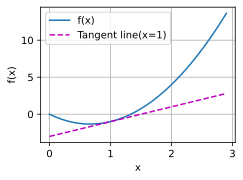

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


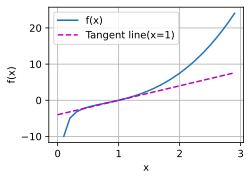

In [ ]:
plot(x,[x**3-1/x,4*x-4],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

# 自动求导
> 我们可以通过深度学习框架自动计算导数,例如，我们想对y=2x转置x关于列向量x求导。

In [ ]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True)   #在计算y关于x的梯度之前，我们需要一个地方来存储梯度，但他不会每次都重新分配内存，等价于x = torch.arange(4.0,requires_grad=True)
x.grad   #默认是None

In [ ]:
y = 2 * torch.dot(x, x)   #y是个标量
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()    #我们可以通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。这些梯度会积累，下次算的时候记得清零
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x   #y=2x转置x的梯度应该是4x，验证一下！ 

tensor([True, True, True, True])

In [ ]:
#在算另一个函数我们要把梯度清零
x.grad.zero_()
y = x.sum()   #求和相当于x向量乘一个全1向量
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
#非标量变量的反向传播，y不是标量。y关于向量x的导数最自然的解释是一个矩阵，也可以是高阶张量
#对于非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度，在例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
#等价于y.backward(torch.ones(len(x)))
#y.sum().backward()
y.backward(torch.ones(len(x)))#y不是标量，所以不能直接求梯度，参数是指
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()  #将某些计算移动到记录之外，这里是把y当成一个常数而不是x的函数
z = u * x     #自然u是个常数，z求导自然是u

z.sum().backward()
x.grad == u,

(tensor([True, True, True, True]), tensor([0., 1., 4., 9.]))

In [ ]:
def f(a):     #定义了一个函数，类似于分段线性函数
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b
  else:
    c = 100 * b
  return c

In [ ]:
a = torch.randn(size=(),requires_grad=True)    #这里确定自变量a的值
d = f(a)
d.backward()         #求d关于a的导数，这里的意思是，函数通过python的控制流（比如：条件，循环等）我们通过自动求导还是可以求导的
a.grad == d / a

(tensor(1.0368, requires_grad=True), tensor(True))

# 线性回归的简洁实现

In [ ]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [ ]:
true_w = torch.tensor([2,-3.4])    #生成数据集
true_b = 4.2
features,lables = d2l.synthetic_data(true_w,true_b,1000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
  """"构造一个pytorch'数据迭代器"""
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset,batch_size,shuffle=is_train)    #最后一个参数是在每个迭代周期内打乱数据

In [ ]:
batch_size = 10
data_iter = load_array((features,lables),batch_size)

next(iter(data_iter))     #这里用iter构造python迭代器，并用next获取迭代器第一项

[tensor([[-6.5746e-01, -4.4352e-02],
         [-5.9481e-01, -9.8925e-01],
         [ 1.4476e+00, -1.3528e-01],
         [ 6.0232e-01,  1.9004e+00],
         [-5.5559e-01,  2.9623e-01],
         [ 1.5712e-03, -9.5036e-01],
         [ 2.8432e-01, -2.3575e-01],
         [-5.1333e-01, -1.6911e-01],
         [ 6.0579e-01,  5.7433e-01],
         [ 4.1038e-01,  1.6767e+00]]), tensor([[ 3.0572],
         [ 6.3798],
         [ 7.5537],
         [-1.0620],
         [ 2.0722],
         [ 7.4321],
         [ 5.5690],
         [ 3.7574],
         [ 3.4674],
         [-0.6823]])]

In [ ]:
#定义模型
from torch import nn

net = nn.Sequential(nn.Linear(2,1))  #第一个参数表示的是输入的特征形状，第二个参数表示的是输出的特征形状

In [ ]:
#使用net之前，要初始化模型参数，使用weight.data和bias.data方法访问参数，使用替换方法normal_和fill_来重写参数
net[0].weight.data.normal_(0,0.1)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
#定义损失函数，这里我们用mse，均值平方误差，
loss = nn.MSELoss()

> 这里有个小问题，为何要设定损失函数？而不是把识别精度作为指标？
>> 在神经网络的学习中，寻找最优参数时，要寻找使损失函数的值尽可能小（这样也保证了精度）的参数。为了找到使损失函数的值尽可能小的地方，需要计算参数的导数（梯度)，表示的是如果稍稍改变这个权重的值，损失函数会如何变化？如果导数值为负，通过使该权重参数向正方向改变，减少损失函数的值；反之也成立，但导数为0时，无论权重怎么变化，都不会影响损失函数的值。之所以不能直接用精度来作为指标，是因为有大多是地方使得参数的导数为0，导致了参数无法更新。

In [ ]:
#定义优化算法，这里我选小批量随机梯度下降算法，SGD，这里的超参数只有学习速率lr
trainer = torch.optim.SGD(net.parameters(),lr=0.03)  #

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
  for X,y in data_iter:
    l = loss(net(X),y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features),lables)
  print(f'epoch  {epoch+1},loss{l:f}')

epoch  1,loss0.000093
epoch  2,loss0.000093
epoch  3,loss0.000094
epoch  4,loss0.000093
epoch  5,loss0.000094


In [ ]:
#接下来我们计算估计误差
w = net[0].weight.data
print(f'w的值：{w}  w真实值：{true_w} w的估计误差：{true_w - w.reshape(true_w.shape)}')
b = net[0].bias.data
print(f'b的值：{b} b真实值：{true_b} b的估计误差：{true_b - b}')

w的值：tensor([[ 2.0007, -3.3997]])  w真实值：tensor([ 2.0000, -3.4000]) w的估计误差：tensor([-0.0007, -0.0003])
b的值：tensor([4.2002]) b真实值：4.2 b的估计误差：tensor([-0.0002])


# 图像分类数据集

In [ ]:
#Fashion-MNIST数据集
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
#通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存
#通过ToTensor实例将图像数据从PIL类型转换为32位浮点数格式
#并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)  #train=True是下载的训练数据集
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(mnist_train),len(mnist_test)   #这个数据集有10个类别图像组成，每个类别有6000张图像做训练数据集，1000张图像做测试数据集。

(60000, 10000)

In [ ]:
mnist_train[0][0].shape  #每个图像的高度和宽度均为28像素，数据集由灰度图像组成，其通道数为1。这里的mnist_train[0][0]第一个标号是指第一张图片，第二个标号是指取的是图片而不是label

torch.Size([1, 28, 28])

In [ ]:
def get_fashion_mnist_labels(labels):#本函数是用于在数字标签索引及其文本名称之间转换
  """返回Fashion-MNIST数据集的文本标签"""
  text_labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
  return [text_labels[int(i)] for i in labels]

In [ ]:
#创建一个函数可视化这些样本
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

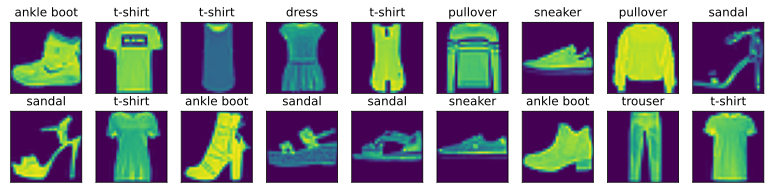

In [ ]:
X ,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y));

In [ ]:
#读取小批量
batch_size = 256

def get_dataloader_workers():
  """"使用4个进程来读取数据"""
  return 4

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())  #用迭代器获取训练集

timer = d2l.Timer()
for X,y in train_iter:
  continue
f'{timer.stop():.2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'5.91 sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None): #这个函数将上面的那些整合，用于获取和读取Fashion-MNIST数据集，他返回训练集和验证集的数据迭代器
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""    #其中还有一个可选参数，用将图像的大小调整为另一种形状
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [ ]:
#来实验一下可选参数的功能
train_iter,test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
  print(X.shape,X.dtype,y.shape,y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


# softmax回归的简洁实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)  #获取训练数据集和验证数据集

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#初始化模型参数

#pytorch 不会隐式地调整输入的形状，因此我们在线性曾前定义了展平层（flatten），来调整网络输入的形状

net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight,std=0.01)

net.apply(init_weights);

In [ ]:
loss = nn.CrossEntropyLoss()#损失函数

In [ ]:
#优化算法，用学习率为0.1的小批量随机梯度下降
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

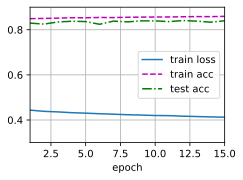

In [ ]:
#训练
num_epochs = 15
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)